In [1]:
# import pandas,numpy,matplot libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# display all verzilations matplot inside the same screen with code.  
%matplotlib inline


In [2]:
# used pandas methods to hent dataset from pathfile
# and change data to numpy array, so become easy to split and train og evolate.
path = "digital_letters.csv"
data = pd.read_csv(path)
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,label
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E


In [3]:
data['label']

0        A
1        B
2        C
3        D
4        E
        ..
13125    V
13126    W
13127    X
13128    Y
13129    Z
Name: label, Length: 13130, dtype: object

In [4]:
# change data to numpy array.
dataset = data.to_numpy()
dataset

array([[0, 0.0, 0.0, ..., 0.0, 0.0, 'A'],
       [1, 0.0, 0.0, ..., 0.0, 0.0, 'B'],
       [2, 0.0, 0.0, ..., 0.0, 0.0, 'C'],
       ...,
       [13127, 0.0, 0.0, ..., 0.0, 0.0, 'X'],
       [13128, 0.0, 0.0, ..., 0.0, 0.0, 'Y'],
       [13129, 0.0, 0.0, ..., 0.0, 0.0, 'Z']], dtype=object)

In [5]:
# used shape to descoverd data length(many numbers)
# and how many rows 
dataset.shape

(13130, 786)

In [6]:
#take all columns and rows in the numpy array.
dataset[0:785]

array([[0, 0.0, 0.0, ..., 0.0, 0.0, 'A'],
       [1, 0.0, 0.0, ..., 0.0, 0.0, 'B'],
       [2, 0.0, 0.0, ..., 0.0, 0.0, 'C'],
       ...,
       [782, 0.0, 0.0, ..., 0.0, 0.0, 'C'],
       [783, 0.0, 0.0, ..., 0.0, 0.0, 'D'],
       [784, 0.0, 0.0, ..., 0.0, 0.0, 'E']], dtype=object)

In [7]:
# the first index in array we don't need.
dataset[:,0]

array([0, 1, 2, ..., 13127, 13128, 13129], dtype=object)

In [8]:
# see how many data    ,data type             ,array dimentions number.
dataset[:,1:785].shape , dataset[:,1:785].dtype, dataset[:,1:785].ndim

((13130, 784), dtype('O'), 2)

In [9]:
# all raows and columns without first colum (0)and last label column(786).
features= dataset[:,1:785]
features


array([[0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [10]:
# the target dataset the last column 'label'.
labels=dataset[:,785]
labels.shape ,labels.dtype ,labels.ndim

((13130,), dtype('O'), 1)

In [11]:
labels

array(['A', 'B', 'C', ..., 'X', 'Y', 'Z'], dtype=object)

In [12]:
# change the data type for labels objectes to int, labelbinazer 
# change eatch value in labels to give it one tal.
from sklearn.preprocessing import LabelBinarizer
binencoder = LabelBinarizer()
labels_ready = binencoder.fit_transform(labels)
labels_ready

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [13]:
labels_ready.shape ,labels_ready.dtype ,labels_ready.ndim

((13130, 26), dtype('int32'), 2)

In [14]:
# make  features values between 0 and 1. 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
features_ready = scaler.fit_transform(features)
features_ready

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
features_ready.shape ,  features_ready.dtype ,   features_ready.ndim

((13130, 784), dtype('float64'), 2)

In [16]:
# split dataset to train first 2000 values 
# and 1000 to validation and th raminder data to test partions.

X_test, X_valid, X_train   =  features_ready[2000:]  , features_ready[2000:3000], features_ready[3000:]
y_test, y_valid, y_train   =  labels_ready[2000:]  , labels_ready[2000:3000], labels_ready[3000:]


In [17]:
# see result
X_train.shape ,X_train.ndim , X_train.dtype

((10130, 784), 2, dtype('float64'))

In [18]:
# changr the shape of array like matches the input shape for the
# model -1 numbers of vlaues 28,28 the pixel in eatch value, 1 one deminstional 
# in the images value.
X_train_ready=X_train.reshape(-1,28,28,1)
X_train_ready.shape  ,  X_train_ready.dtype ,  X_train_ready.ndim

((10130, 28, 28, 1), dtype('float64'), 4)

In [19]:
# the same for validations data.
X_valid_ready = X_valid.reshape(-1,28,28,1)
X_valid_ready.shape  ,  X_valid_ready.dtype  ,  X_valid_ready.ndim

((1000, 28, 28, 1), dtype('float64'), 4)

In [20]:
# change the shape so we can used to evulate the model.
X_test_ready = X_test.reshape(-1,28,28,1)
X_test_ready.shape , X_test_ready.dtype , X_test_ready.ndim

((11130, 28, 28, 1), dtype('float64'), 4)

In [21]:
y_test.shape, y_test.dtype , y_test.ndim 

((11130, 26), dtype('int32'), 2)

In [22]:
y_valid.shape , y_valid.dtype , y_valid.ndim

((1000, 26), dtype('int32'), 2)

In [23]:
y_train.shape , y_train.dtype , y_train.ndim

((10130, 26), dtype('int32'), 2)

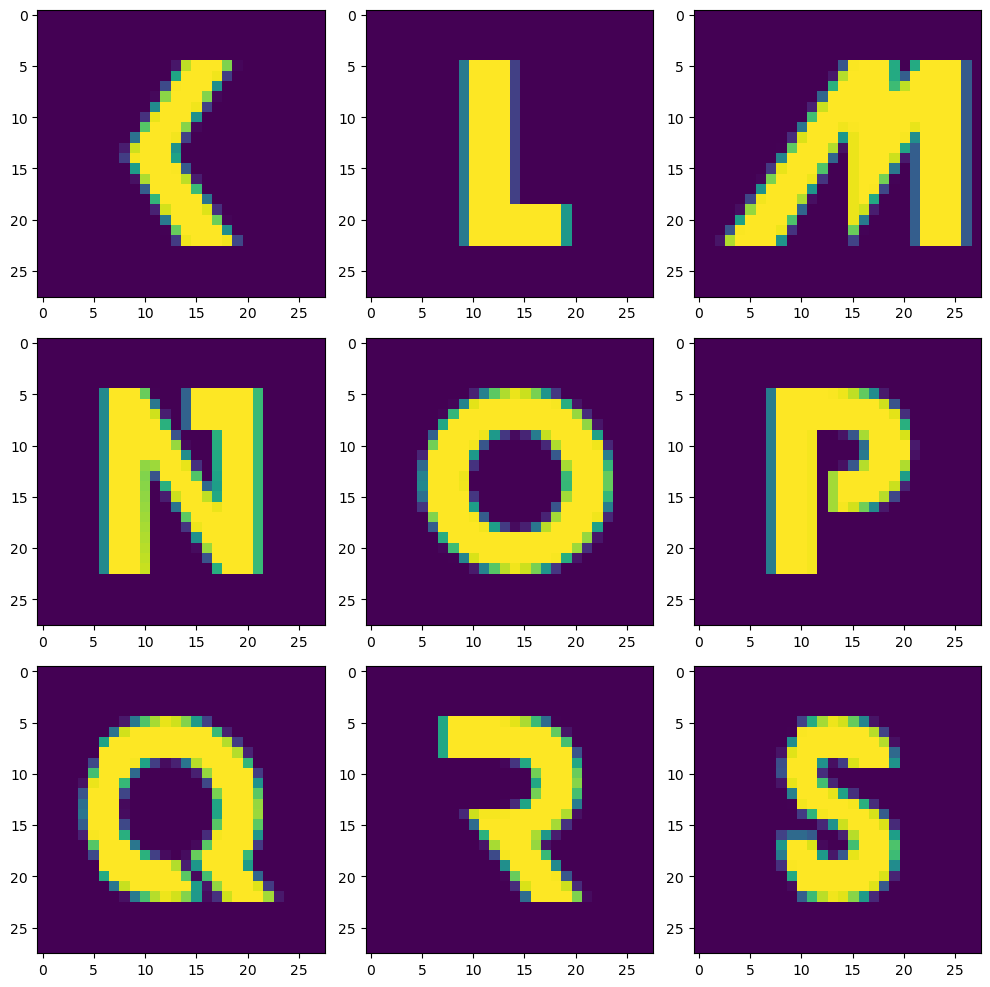

In [24]:
# nine images exaple from training set
import matplotlib.pyplot as plt
X_images = X_train_ready.reshape(-1,28,28)
plt.subplots(3,3, figsize=(10,10))
for i in range(9):
    arr = X_images[i]
    plt.subplot(3,3, i+1)
    plt.imshow(arr)
plt.tight_layout()
plt.show()

In [25]:
# import the sequential algorithims for CNN
from keras.models import Sequential
from tensorflow import keras
model = keras.models.Sequential([
    # add first input convolutional layer (Conv2D class) with padding Zero
    # the number of filters increase with hyaer layers
    # receptive field (kernel_size (7x7))
    # with input shape 28,28 to images pixel and 1 to one color chanal in eatch image
    keras.layers.Conv2D(filters=64, kernel_size=7, activation='relu', padding="SAME", 
                        input_shape=[28, 28, 1]),
    # pooling layer added after eatch convolutional layer
    # to shrink the input image.
    # MaxPooling2D the class with size(2x2) for receptive field
    keras.layers.MaxPooling2D(pool_size=2),
    # repeated  convolutional layer depended after how many images in the data
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="SAME"),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    # repeated  convolutional layer 
    keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding="SAME"),
    keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    # flatten layer to make all data in one dimention input
    keras.layers.Flatten(),
    # the hidden fylly conecting layers
    keras.layers.Dense(units=128, activation='relu'),
    # to reduce overfitting
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    #output layer 
    keras.layers.Dense(units=26, activation='softmax'),
])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         2

In [27]:
# loss (categorical_crossentropy) that we  If we were doing binary classification (with one binary labels),
# with momentum optimizer the model will training faster
# metrics to compute during training and evaluation.
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.SGD(momentum=0.9), metrics=["accuracy"])

In [28]:
# train the model 
history = model.fit(X_train_ready, y_train, epochs=20, validation_data=(X_valid_ready, y_valid))

Epoch 1/20
317/317 [==============================] - 83s 257ms/step - loss: 3.2160 - accuracy: 0.0586 - val_loss: 2.8951 - val_accuracy: 0.1900
Epoch 2/20
317/317 [==============================] - 84s 266ms/step - loss: 2.3323 - accuracy: 0.3050 - val_loss: 1.7483 - val_accuracy: 0.5100
Epoch 3/20
317/317 [==============================] - 86s 271ms/step - loss: 1.5789 - accuracy: 0.5391 - val_loss: 1.3729 - val_accuracy: 0.6100
Epoch 4/20
317/317 [==============================] - 86s 271ms/step - loss: 1.2828 - accuracy: 0.6319 - val_loss: 1.2047 - val_accuracy: 0.6390
Epoch 5/20
317/317 [==============================] - 87s 273ms/step - loss: 1.1216 - accuracy: 0.6824 - val_loss: 1.1297 - val_accuracy: 0.6880
Epoch 6/20
317/317 [==============================] - 85s 270ms/step - loss: 1.0004 - accuracy: 0.7139 - val_loss: 1.0377 - val_accuracy: 0.6920
Epoch 7/20
317/317 [==============================] - 85s 269ms/step - loss: 0.9040 - accuracy: 0.7420 - val_loss: 1.1342 - val_ac

In [29]:
#loss func to compares the desired output and the actual output of the network.
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<AxesSubplot:>

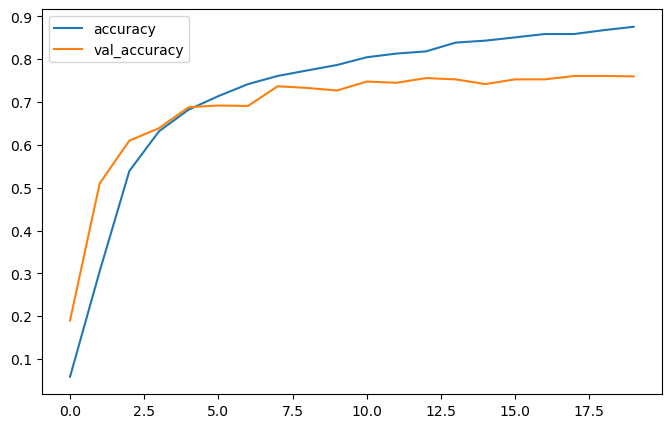

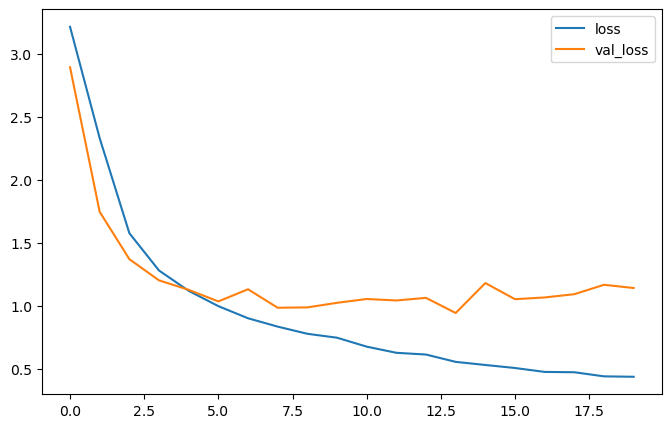

In [30]:
#create a Pandas DataFrame using this dictionary and call its plot() method
#  both the training and validation accuracy steadily increase during
# training, while the training and validation loss decrease,means good enougth for this model.

history = pd.DataFrame(history.history)
history.loc[:,['accuracy','val_accuracy']].plot(figsize=(8,5))
history.loc[:,['loss','val_loss']].plot(figsize=(8,5))

In [31]:
# evaluate the model on the test set to estimate the generalization error.
model.evaluate(X_test_ready, y_test)

348/348 [==============================] - 23s 65ms/step - loss: 0.3105 - accuracy: 0.9188


[0.31045493483543396, 0.9187780618667603]

In [32]:
# see how the model can classified three images 
X_new = X_test_ready[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 151ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [33]:
# see the predections result with classes labels
y_pred = model.predict(X_new)
classes_x=np.argmax(y_pred,axis=1)

1/1 [==============================] - 0s 21ms/step


In [34]:
classes_x

array([24, 25,  0], dtype=int64)

In [35]:
# see the actualy result, means the model classified three images correct.
np.array(labels)[classes_x]

array(['Y', 'Z', 'A'], dtype=object)

In [36]:
# see in array of the three actual letters images,model had classified correct. 
y_new = y_test[:3]
classes_y=np.argmax(y_new,axis=1)
classes_y

array([24, 25,  0], dtype=int64)